In [10]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# 4 sklearn通用的学习模式
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target # 类别

X_train, X_test, y_train, y_test = train_test_split(
    iris_X, iris_y, test_size = 0.3) # 比例0.3
# print(y_train) # 打乱了比例

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.predict(X_test))
print(y_test)

[1 2 2 2 2 2 0 0 2 0 0 2 0 0 0 1 0 1 0 0 1 2 0 0 0 2 2 0 2 0 0 1 1 0 1 1 0
 0 1 2 0 0 0 0 1]
[1 2 2 2 1 2 0 0 1 0 0 2 0 0 0 1 0 1 0 0 1 2 0 0 0 2 2 0 2 0 0 1 1 0 1 1 0
 0 1 2 0 0 0 0 1]


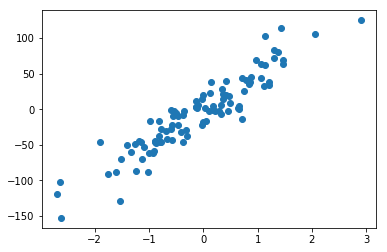

In [19]:
#  5 sklearn 的datasets 的数据库
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# loaded_data = datasets.load_boston()
# data_X = loaded_data.data
# data_y = loaded_data.target

# model = LinearRegression()
# model.fit(data_X, data_y)

# print(model.predict(data_X[:4, :])) # 前4个数据 进行预测
# print(data_y[:4])
X, y = datasets.make_regression(n_samples = 100, n_features = 1, n_targets = 1, noise = 20) #noise 加大就会离散一点
plt.scatter(X, y)
plt.show()

In [60]:
# 6 model 常用属性和功能
from sklearn import datasets
from sklearn.linear_model import LinearRegression

loaded_data = datasets.load_boston()
data_X = loaded_data.data
data_y = loaded_data.target

model = LinearRegression()
model.fit(data_X, data_y)

# print(model.predict(data_X[:4, :]))
# print(data_y[:4])
print(model.coef_) # y = 0.1x + 0.3 就是输出0.3
print(model.intercept_) #就会输出0.3这个东西
print(model.get_params()) #定义了什么参数
print(model.score(data_X, data_y)) # R^2, coefficient of determination R^2 可决系数 精确度输出结果



[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.459488385089855
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
0.7406426641094095


In [37]:
# 7 normalization 标准化数据
from sklearn import preprocessing
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# a = np.array([[10, 2.7, 3.6],
#             [-100, 5, -2],
#             [120, 20, 40]], dtype = np.float64)
# print(a)
# print(preprocessing.scale(a)) # 就是标准化，差不多的取值范围
X, y = make_classification(n_samples = 300, n_features = 2, n_redundant = 0, n_informative = 2,
                          random_state = 22, n_clusters_per_class = 1, scale = 100) # 300个data, 2个属性，2个比较相关的data的属性，随机产生的data一样的
# plt.scatter(X[:, 0], X[:, 1], c=y)
# plt.show()

#X = preprocessing.minmax_scale(X, feature_range = (-1, 1))#压缩到-1 到1

X = preprocessing.scale(X) # 归一化 如果有这一行的话， score就会很高
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)
clf = SVC()
clf.fit(X_train, y_train) # 学习
print(clf.score(X_test, y_test))

0.9555555555555556


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


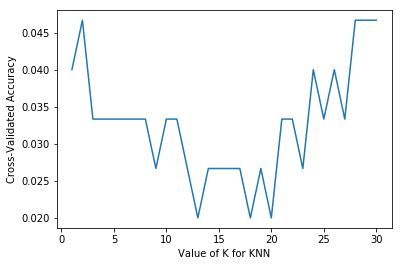

In [53]:
# 8 cross-validation交叉验证
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)
# knn = KNeighborsClassifier(n_neighbors = 5) # 考虑附近的5个， k值
# knn.fit(X_train, y_train)
# print(knn.score(X_test, y_test))

from sklearn.model_selection import cross_val_score #得分
# knn = KNeighborsClassifier(n_neighbors = 5)
# scores = cross_val_score(knn, X, y, cv = 5, scoring = 'accuracy') #用这种成绩，x y 会被分成5组 然后平均
# print(scores.mean())

import matplotlib.pyplot as plt
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
#    scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy') # for classification
    loss = -cross_val_score(knn, X, y, cv = 10, scoring = 'neg_mean_squared_error') # for regression
#     k_scores.append(scores.mean())
    k_scores.append(loss.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


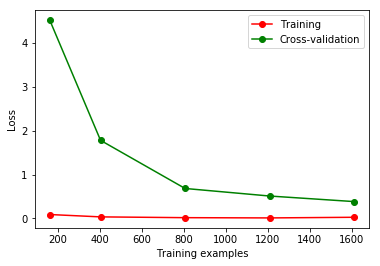

In [56]:
# overfitting 9 交叉验证 2
#过于纠结准确度
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target

train_sizes, train_loss, test_loss = learning_curve(
    SVC(gamma = 0.001), X, y, cv = 10, scoring = 'neg_mean_squared_error',
    train_sizes = [0.1, 0.25, 0.5, 0.75, 1])
train_loss_mean = -np.mean(train_loss, axis = 1)
test_loss_mean = -np.mean(test_loss, axis = 1)

plt.plot(train_sizes, train_loss_mean,'o-', color ='r', # 学习的每一步 size, 学习每一步对应的值 mean value
        label = "Training")
plt.plot(train_sizes, test_loss_mean, 'o-', color = 'g',
        label = "Cross-validation")

plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc = "best")
plt.show()

In [58]:
# 10 交叉验证3
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target
param_range = np.logspace(-6, -2.3, 5)#在这个范围取5个点进行拟合

train_loss, test_loss = validation_curve(
    SVC(), X, y, param_name = 'gamma'，param_range = param_range, cv = 10, scoring = 'neg_mean_squared_error')
train_loss_mean = -np.mean(train_loss, axis = 1)
test_loss_mean = -np.mean(test_loss, axis = 1)

plt.plot(param_range, train_loss_mean,'o-', color ='r', # 学习的每一步 size, 学习每一步对应的值 mean value
        label = "Training")
plt.plot(param_range, test_loss_mean, 'o-', color = 'g',
        label = "Cross-validation")

plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend(loc = "best")
plt.show()

SyntaxError: invalid character in identifier (<ipython-input-58-09e51d2ff130>, line 14)